In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

housing = pd.read_csv('data/housing.csv')
housing.dropna(inplace=True)
housing.drop(columns=['ocean_proximity'], inplace=True)

X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


### MLPs Using Functional API

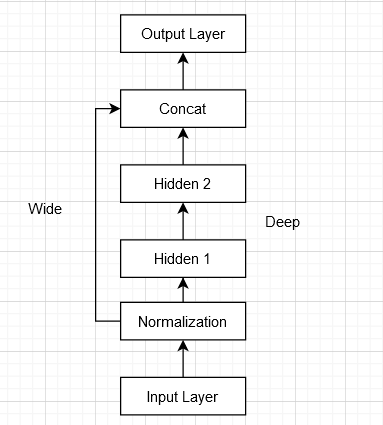

In [3]:
import tensorflow as tf

# creating the layers that needs to build the model
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# layer's function to go from input to output
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

# create a Model object
model = tf.keras.Model(inputs=[input_], outputs =[output])

# compile
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 34946482176.0000 - root_mean_squared_error: 186939.7812 - val_loss: 10575966208.0000 - val_root_mean_squared_error: 102839.5156
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 8869471232.0000 - root_mean_squared_error: 94177.8672 - val_loss: 7001147392.0000 - val_root_mean_squared_error: 83672.8594
Epoch 3/10
489/489 [==============================] - 1s 2ms/step - loss: 6260413952.0000 - root_mean_squared_error: 79122.7812 - val_loss: 5341483008.0000 - val_root_mean_squared_error: 73085.4531
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 5142160384.0000 - root_mean_squared_error: 71708.8594 - val_loss: 4733778432.0000 - val_root_mean_squared_error: 68802.4609
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 4769995776.0000 - root_mean_squared_error: 69065.1562 - val_loss: 4534674432.0000 - val_root_mean_squared_error: 67339.9922
Epoch 

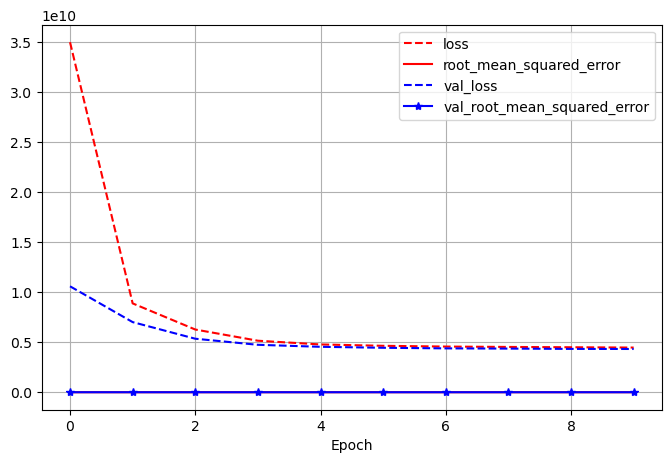

In [4]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

What if we want to send a subset of the features through the wide path and different subset through a deep path, as illustrated in the following figure: 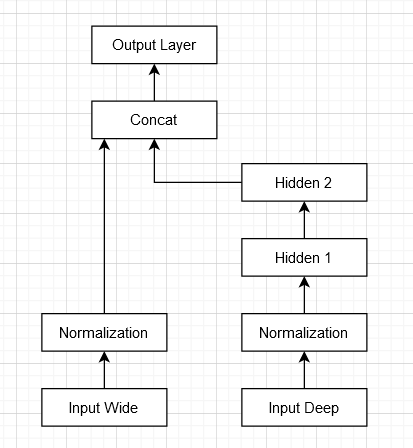

In [5]:
input_wide = tf.keras.layers.Input(shape=[5]) # feature 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # feature 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Now instead of passing a single input matrix X_train, we must pass a poin of matrix (X_train_wide, X_train_deep). 
And this is true for test and new data.

In [6]:
X_train_wide, X_train_deep = X_train.iloc[:, :5], X_train.iloc[:, 2:]
X_test_wide, X_test_deep = X_test.iloc[:, :5], X_test.iloc[:, 2:]
X_new_wide, X_new_deep = X_test_wide.iloc[:3], X_test_deep.iloc[:3]

In [7]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=10, validation_split=0.1)

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 56052125696.0000 - root_mean_squared_error: 236753.2969 - val_loss: 54758887424.0000 - val_root_mean_squared_error: 234006.1719
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 54916308992.0000 - root_mean_squared_error: 234342.2969 - val_loss: 52588220416.0000 - val_root_mean_squared_error: 229321.2188
Epoch 3/10
489/489 [==============================] - 1s 2ms/step - loss: 51351130112.0000 - root_mean_squared_error: 226607.8750 - val_loss: 47742681088.0000 - val_root_mean_squared_error: 218500.9844
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 45246574592.0000 - root_mean_squared_error: 212712.4219 - val_loss: 40793096192.0000 - val_root_mean_squared_error: 201973.0156
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 37700837376.0000 - root_mean_squared_error: 194167.0312 - val_loss: 33165385728.0000 - val_root_mean_squared_error: 18

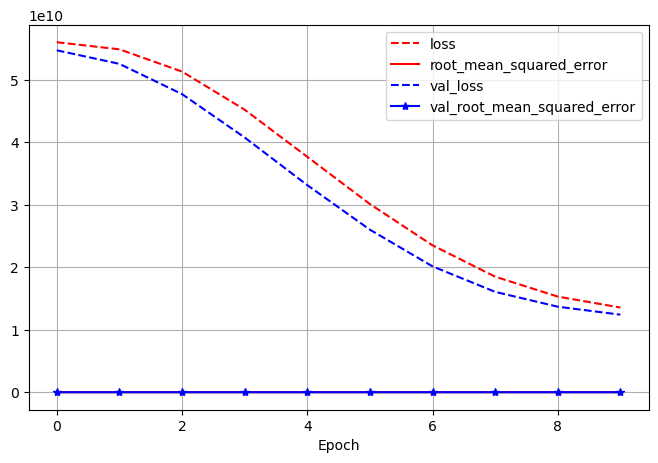

In [8]:
pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [9]:
model.evaluate((X_test_wide, X_test_deep), y_test)

96/96 [==============================] - 0s 2ms/step - loss: 12496222208.0000 - root_mean_squared_error: 111786.5000


[12496222208.0, 111786.5]

In [10]:
y_pred = model.predict((X_new_wide,X_new_deep))
y_pred

1/1 [==============================] - 0s 154ms/step


array([[129246.38],
       [388466.72],
       [221795.31]], dtype=float32)

In [12]:
y_test[:3]

14425     80100.0
16398    500001.0
7721     352100.0
Name: median_house_value, dtype: float64

Handling multiple outputs, in the following example shows how to add auxiliary output for regularization:
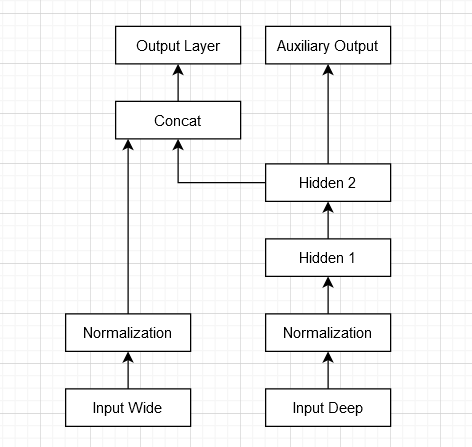

In [14]:
input_wide = tf.keras.layers.Input(shape=[5]) # feature 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # feature 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output, aux_output])

Each output will need its own loss function. Therefor, when we compile the model we should pass list of losses. Since we care more about the main output than about the auxiliary output, we want to give the main output's loss a much greater weight.

In [16]:
model.compile(
    loss = ("mse","mse"),
    loss_weights= (0.9, 0.1),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train,y_train), epochs=10, validation_split=0.1)

Epoch 1/10
489/489 [==============================] - 3s 3ms/step - loss: 56045199360.0000 - dense_12_loss: 56043462656.0000 - dense_13_loss: 56060772352.0000 - dense_12_root_mean_squared_error: 236735.0000 - dense_13_root_mean_squared_error: 236771.5625 - val_loss: 54729781248.0000 - val_dense_12_loss: 54724165632.0000 - val_dense_13_loss: 54780354560.0000 - val_dense_12_root_mean_squared_error: 233931.9688 - val_dense_13_root_mean_squared_error: 234052.0312
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 54840324096.0000 - dense_12_loss: 54826803200.0000 - dense_13_loss: 54962348032.0000 - dense_12_root_mean_squared_error: 234151.2344 - dense_13_root_mean_squared_error: 234440.5000 - val_loss: 52396949504.0000 - val_dense_12_loss: 52374016000.0000 - val_dense_13_loss: 52603580416.0000 - val_dense_12_root_mean_squared_error: 228853.7031 - val_dense_13_root_mean_squared_error: 229354.7031
Epoch 3/10
489/489 [==============================] - 1s 3ms/step - loss

In [18]:
eval_results = model.evaluate((X_test_wide,X_test_deep), (y_test,y_test), return_dict=True)
weighted_sum_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

96/96 [==============================] - 0s 2ms/step - loss: 13890201600.0000 - dense_12_loss: 13881509888.0000 - dense_13_loss: 13968428032.0000 - dense_12_root_mean_squared_error: 117819.8203 - dense_13_root_mean_squared_error: 118188.1016


In [21]:
eval_results

{'loss': 13890201600.0,
 'dense_12_loss': 13881509888.0,
 'dense_13_loss': 13968428032.0,
 'dense_12_root_mean_squared_error': 117819.8203125,
 'dense_13_root_mean_squared_error': 118188.1015625}

In [33]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(f"Main: {y_pred_main}'\n'Aux: {y_pred_aux}")

1/1 [==============================] - 0s 30ms/step
Main: [[125543.734]
 [381751.7  ]
 [242393.2  ]]'
'Aux: [[123814.28]
 [376435.3 ]
 [239009.  ]]


In [34]:
y_pred_tuple = model.predict((X_test_wide, X_test_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

96/96 [==============================] - 0s 2ms/step


In [42]:
y_pred

{'dense_12': array([[125543.72],
        [381751.66],
        [242393.2 ],
        ...,
        [317844.62],
        [240559.78],
        [144349.52]], dtype=float32),
 'dense_13': array([[123814.27],
        [376435.3 ],
        [239009.  ],
        ...,
        [313410.53],
        [237204.52],
        [142335.11]], dtype=float32)}